# Linear regression

### Import necessary libraries

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### load data
You can get the data from [here](https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression?resource=download).

In [56]:
data = pd.read_csv("data/Salary_Data.csv")

### Data analysis

In [57]:
data.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [58]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


- data is not scaled -> normalization is necessary

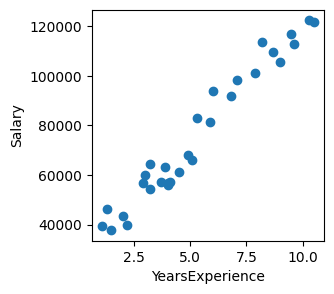

In [70]:
plt.figure(figsize=(3,3))
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

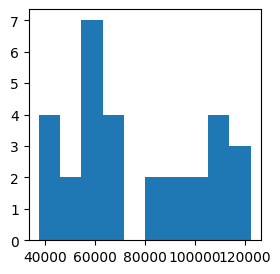

In [69]:
plt.figure(figsize=(3,3))
plt.hist(data['Salary'])
plt.show()

### Training

Note:

For X (Input Features):
Scikit-learn models expect the input features X to be a 2D array or DataFrame. When there is only one feature you have to use either:
- df[feature_name].values.reshape(-1, 1)
- df[[feature_name]]


For y (Target Values):
The target variable y (like salary) can remain as a 1D array or Series. 

In [90]:
X = data[['YearsExperience']]
y = data['Salary']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [91]:
# R2 score
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9645401573418146, 0.9024461774180497)

In [93]:
model.coef_, model.intercept_

(array([9423.81532303]), 25321.583011776813)

In [95]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### Evaluation

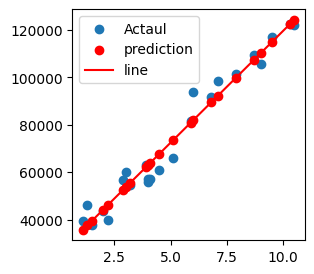

In [132]:
y_train_predict = model.predict(x_train)
x_range = np.linspace(x_train.min(), x_train.max(), 100, ).reshape(-1,1)
y_pred = model.predict(x_range)

plt.figure(figsize=(3,3))
plt.scatter(x_train, y_train, label='Actaul')
plt.scatter(x_train, y_train_predict, color='red', label='prediction')
plt.plot(x_range, y_pred, color='red', label='line')
plt.legend()
plt.show()

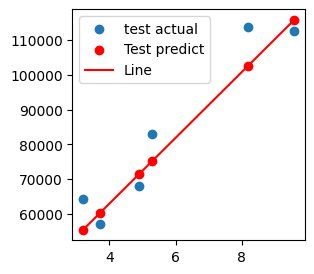

In [155]:
y_tetst_pred = model.predict(x_test)
x_range = np.linspace(x_test.min(), x_test.max(), 100, ).reshape(-1,1)
y_pred = model.predict(x_range)

plt.figure(figsize=(3,3))
plt.scatter(x_test, y_test, label='test actual')
plt.scatter(x_test, y_tetst_pred, color='red', label='Test predict')
plt.plot(x_range, y_pred, label='Line', color='red')
plt.legend()
plt.show()

### R² (R-squared)

R² is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It ranges from 0 to 1, where:

- 0 indicates that the model does not explain any of the variability of the response data around its mean.
- 1 indicates that the model explains all the variability of the response data around its mean.

### MSE (Mean Squared Error)

MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values (predictions) and the actual value.

- A lower MSE value indicates a better fit of the model to the data.
- MSE is sensitive to outliers, as it squares the errors, which can disproportionately affect the score.

### Mean Absolute Error (MAE)

Mean Absolute Error (MAE) is a metric that measures the average magnitude of the errors in a set of predictions, without considering their direction. It represents the average absolute difference between the predicted values and the actual values.

- MAE provides a straightforward interpretation of the average error in the same units as the target variable, making it easy to understand.
- A lower MAE indicates a better model performance.

In [152]:
y_tetst_pred = model.predict(x_test)

print("mean_absolute_error: ", round(mean_absolute_error(y_test, y_tetst_pred), 2))
print("mean_squared_error: ", round(mean_squared_error(y_test, y_tetst_pred), 2))
print("r2_score: ", round(r2_score(y_test, y_tetst_pred), 2))

mean_absolute_error:  6286.45
mean_squared_error:  49830096.86
r2_score:  0.9
